# Module 1 Report - Olympic Games
**Analyzing the Top Sport Categories**

By: Billie Kim

Data Source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

## Contents
1. [Objective](#1.-Objective)
2. [Data Exporation](#2.-Data-Exporation)
3. [One Column Selection](#3.-One-Column-Selection)
4. [Series](#4.-Series)
5. [Plot](#5.-Plot)
6. [Summary](#6.-Summary)
7. [Recommendations](#7.-Recommendations)

## 1. Objective
The Olympic games are held every four years and hosts winter and summer competetions with athletes from all around the world. In the next upcoming games, the Kellogg Company has decided to become one of the main sponsors.

Selecting the right athlete and sporting category is an important factor for brand alignment and broad viewership. Therefore, we have been tasked to analyze data collected from 120 years of Olympic history (hosted on kaggle) and find key insights that will help Kellog's business decision makers determine the right sport and athletes to sponsor.

In this report, we will take a deeper dive into the top sporting categories of the Olympics which would help determine a pool of suitable and ideal choices for sponsorship from Kellogs.


## 2. Data Exporation
We will begin by loading our data and start the data exploration phase:
- print the number of rows and columns
- print the top 10 rows of data
- print the classes of our features
- print summaries (min, max, percentiles) of our numeric features

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load Olympic Games Data
df <- read.csv("athlete_events.csv", stringsAsFactors=FALSE, na.strings="")

In [3]:
# Print the number of rows and columns
cat("Number of Rows:")
nrow(df)

cat("Number of Columns:")
ncol(df)

Number of Rows:

[1] 271116

Number of Columns:

[1] 15

In [4]:
# Print the top 10 Rows of data
head(df,n=10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
6,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA
8,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NA
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NA


In [5]:
# Print the classes of our features
str(df)

'data.frame':	271116 obs. of  15 variables:
 $ ID    : int  1 2 3 4 5 5 5 5 5 5 ...
 $ Name  : chr  "A Dijiang" "A Lamusi" "Gunnar Nielsen Aaby" "Edgar Lindenau Aabye" ...
 $ Sex   : chr  "M" "M" "M" "M" ...
 $ Age   : chr  "24" "23" "24" "34" ...
 $ Height: chr  "180" "170" "NA" "NA" ...
 $ Weight: chr  "80" "60" "NA" "NA" ...
 $ Team  : chr  "China" "China" "Denmark" "Denmark/Sweden" ...
 $ NOC   : chr  "CHN" "CHN" "DEN" "DEN" ...
 $ Games : chr  "1992 Summer" "2012 Summer" "1920 Summer" "1900 Summer" ...
 $ Year  : int  1992 2012 1920 1900 1988 1988 1992 1992 1994 1994 ...
 $ Season: chr  "Summer" "Summer" "Summer" "Summer" ...
 $ City  : chr  "Barcelona" "London" "Antwerpen" "Paris" ...
 $ Sport : chr  "Basketball" "Judo" "Football" "Tug-Of-War" ...
 $ Event : chr  "Basketball Men's Basketball" "Judo Men's Extra-Lightweight" "Football Men's Football" "Tug-Of-War Men's Tug-Of-War" ...
 $ Medal : chr  "NA" "NA" "NA" "Gold" ...


In [6]:
# We will turn the features 'Age','Height', and 'Weight' into numerics
df$Age <- as.numeric(df$Age)
df$Height <- as.numeric(df$Height)
df$Weight <- as.numeric(df$Weight)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [7]:
# We will print out some measures of our numeric features such as the min, max, and percentiles
summary(df$Height)[c(1:3,5:6)]
summary(df$Weight)[c(1:3,5:6)]
summary(df$Age)[c(1:3,5:6)]

   Min. 1st Qu.  Median 3rd Qu.    Max. 
    127     168     175     183     226 

   Min. 1st Qu.  Median 3rd Qu.    Max. 
     25      60      70      79     214 

   Min. 1st Qu.  Median 3rd Qu.    Max. 
     10      21      24      28      97 

## 3. One Column Selection
We will select the numeric feature 'Age' and print out the top 10 largest values.

In [8]:
# select and sort the Age column
age_sorted <- sort(df$Age, decreasing=TRUE)

In [9]:
# Print top 10 largest values
head(age_sorted, n=10)

[1] 97 96 88 88 88 84 81 81 80 80

**Comment**: Here, we are seeing that oldest Olympians to compete are higher than 80 years of age which is quite abnormal. There could be some data quality issues that may need to be addressed. This may require some more investigation later on.

## 4. Series

In [10]:
# We are curious about what sport categories in the Olympic games have the most gold medals
gold_df <- df[df$Medal == 'Gold',]

top_sport <- gold_df %>%
  group_by(Sport) %>%
    summarise(count = n()) %>%
    arrange(desc(count))

print(head(top_sport, n=5))

# A tibble: 5 × 2
  Sport      count
  <chr>      <int>
1 Athletics   1339
2 Swimming    1099
3 Rowing       978
4 Gymnastics   791
5 Fencing      594


**Comment**: We found that the top 5 categories are Athletics, Swimming, Rowing, Gymnasrtics, and Fencing. Next, we will create subsets and find the averages of our numeric features ('Age','Weight','Height) of each sporting category.

In [11]:
# Now that we know what are the top sport categories of gold medalists,
# we are going to take a deeper look into the top 5 sport categories and determine the averages of Age, Height and Weight

# Subset dataframes for each top 5 cagegories
athletics_df <- df[df$Medal == 'Gold' & df$Sport == 'Athletics',]
swimming_df <- df[df$Medal == 'Gold' & df$Sport == 'Swimming',]
rowing_df <- df[df$Medal == 'Gold' & df$Sport == 'Rowing',]
gymnastics_df <- df[df$Medal == 'Gold' & df$Sport == 'Gymnastics',]
fencing_df <- df[df$Medal == 'Gold' & df$Sport == 'Fencing',]

In [12]:
# Averages for Athletics
cat("Average Age, Weight, Height for Athletics Sporting Group:")
a1 = round(mean(athletics_df$Age, na.rm=TRUE),3)
w1 = round(mean(athletics_df$Weight, na.rm=TRUE),3)
h1 = round(mean(athletics_df$Height, na.rm=TRUE),3)

a1
w1
h1

Average Age, Weight, Height for Athletics Sporting Group:

[1] 25.004

[1] 71.786

[1] 177.913

In [13]:
# Averages for Swimming
cat("Average Age, Weight, Height for Athletics Swimming Group:")
a2 = round(mean(swimming_df$Age, na.rm=TRUE),3)
w2 = round(mean(swimming_df$Weight, na.rm=TRUE),3)
h2 = round(mean(swimming_df$Height, na.rm=TRUE),3)

a2
w2
h2

Average Age, Weight, Height for Athletics Swimming Group:

[1] 20.777

[1] 74.025

[1] 181.69

In [14]:
# Averages for Rowing
cat("Average Age, Weight, Height for Rowing Sporting Group:")
a3 = round(mean(rowing_df$Age, na.rm=TRUE),3)
w3 = round(mean(rowing_df$Weight, na.rm=TRUE),3)
h3 = round(mean(rowing_df$Height, na.rm=TRUE),3)

a3
w3
h3

Average Age, Weight, Height for Rowing Sporting Group:

[1] 25.339

[1] 81.65

[1] 185.079

In [15]:
# Averages for Gymnastics
cat("Average Age, Weight, Height for Gymnastics Sporting Group:")
a4 = round(mean(gymnastics_df$Age, na.rm=TRUE),3)
w4 = round(mean(gymnastics_df$Weight, na.rm=TRUE),3)
h4 = round(mean(gymnastics_df$Height, na.rm=TRUE),3)

a4
w4
h4

Average Age, Weight, Height for Gymnastics Sporting Group:

[1] 23.552

[1] 54.684

[1] 161.147

In [16]:
# Averages for Fencing
cat("Average Age, Weight, Height for Fencing Sporting Group:")
a5 = round(mean(fencing_df$Age, na.rm=TRUE),3)
w5 = round(mean(fencing_df$Weight, na.rm=TRUE),3)
h5 = round(mean(fencing_df$Height, na.rm=TRUE),3)

a5
w5
h5

Average Age, Weight, Height for Fencing Sporting Group:

[1] 28.807

[1] 71.837

[1] 177.616

**Comment:** For a better digestible format, we will create a table with our findings on the average values. The average age of swimming category seems to be the youngest at around 21 years of age while the Fencing category has the oldest athletes around 29 years of age.

In [17]:
top.stats.matrix <- matrix(c(a1,w1,h1,a2,w2,h2,a3,w3,h3,a4,w4,h4,a5,w5,h5), ncol=3, byrow=T)

colnames(top.stats.matrix) <- c('Age','Weight','Height')
rownames(top.stats.matrix) <- c('1. Athletics', '2. Swimming', '3. Rowing','4. Gymnastics','5. Fencing')

top.stats.matrix

,Age,Weight,Height
1. Athletics,25.004,71.786,177.913
2. Swimming,20.777,74.025,181.690
3. Rowing,25.339,81.650,185.079
4. Gymnastics,23.552,54.684,161.147
5. Fencing,28.807,71.837,177.616


## 5. Plot
Here we will plot a stacked bar chart showing the top 5 sport categories that will be grouped by sex (M/F).

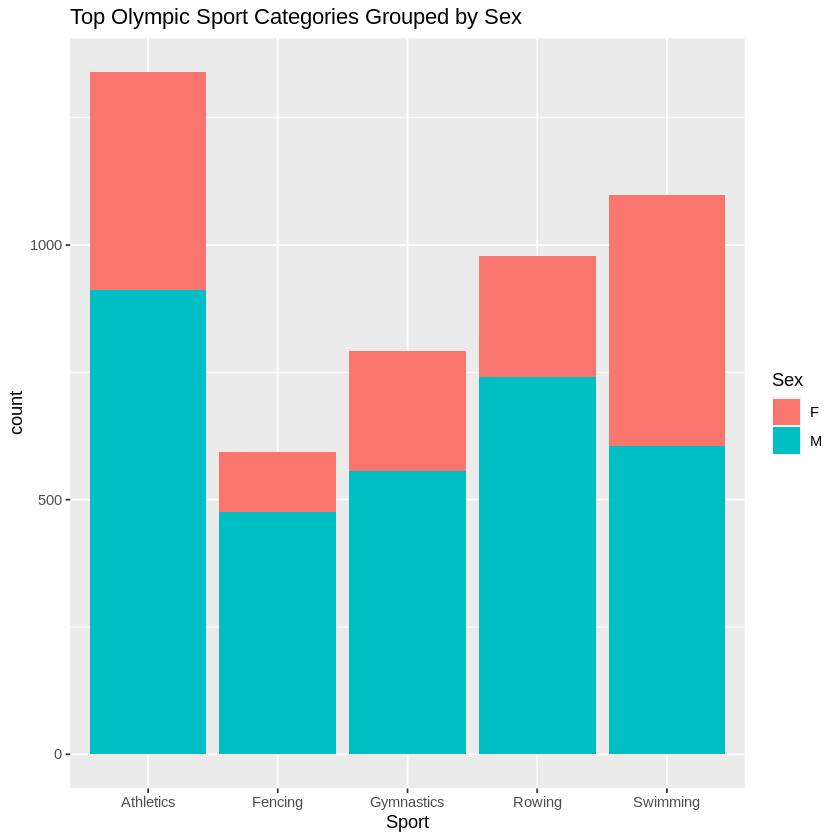

In [18]:
# Merge each sporting category dataframes
stacked <- Reduce(function(x,y) merge(x,y,all=T), list(athletics_df,swimming_df,rowing_df,gymnastics_df,fencing_df))

# Create stacked barchat grouped by 'Sex'
stacked |>
  ggplot(aes(x = Sport)) +
    geom_bar(aes(fill = Sex)) +
      ggtitle(paste("Top Olympic Sport Categories Grouped by Sex"))



**Comment**: We see a greater number of male athletes in each category. Thus, in terms of sponsorship, there may be a smaller pool of female athletes to choose from especially in Fencing, Gymnastics, and Rowing.

## 6. Summary
The dataset contained 271116 records and 15 features. The top 5 sporting categories in the Olympics are Athletics, Swimming, Rowing, Gymnastics, and Fencing. We observed that the average age varies among different sports categories, with swimming having the youngest athletes at approximately 21 years old and fencing having the oldest athletes at around 29 years old. We also found that the oldest Olympian to compete is 97 years old which raises concerns about data quality. In the future, I believe further invesigation is needed to address this concern.

## 7. Recommendations
In terms of choosing an athlete to sponsor in each category, we would recommend that Kellog chooses their ideal candidate based on the average age, height, and weight of previous gold medalists that we have found in our analysis. For example, an ideal candidate in the Swimming category should be 20.777 years of age, 74.025kg, 181.690cm. We also recommend that sponsoring a female candidate should be chosen from the Athletics or Swimming categories since the pool of female athletes are higher than Fencing, Gymnastics, and Rowing categories.